In [1]:
%matplotlib notebook

As described in

https://community.plot.ly/t/tips-for-using-plotly-with-jupyter-notebook-5-0-the-latest-version/4156

Jupyter notebook has an `iopub.data_rate_limit` set to `10^7`, which is usually insufficient for large plots.

It may be sensible to start Jypyter with the option

<pre>
jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10
</pre>

In [2]:
import os, sys
sys.path.append(os.path.abspath('../../main/python'))

In [3]:
import time
import numpy as np
import thalesians.tsa.pypes as pypes
import thalesians.tsa.visual as visual

In [4]:
pype = pypes.Pype(pypes.Direction.INCOMING, name='liveplotpype', port=5777); pype

Pype(name="liveplotpype", direction=Direction.INCOMING, host="localhost", port=5777)

<IPython.core.display.Javascript object>


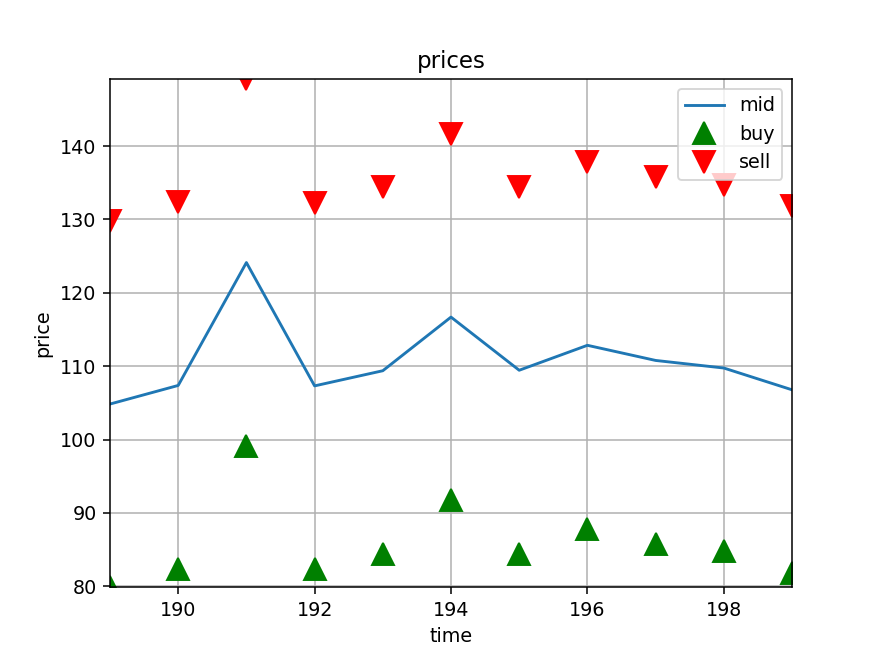

In [5]:
liveplot = visual.LivePlot(keep_last_points=10)
liveplot.ax.plot([], label='mid')
liveplot.ax.plot([], [], '^', ms=12, c='green', label='buy')
liveplot.ax.plot([], [], 'v', ms=12, c='red', label='sell')
liveplot.ax.grid()
liveplot.ax.legend(loc='upper right')
liveplot.ax.set_xlabel('time')
liveplot.ax.set_ylabel('price')
liveplot.ax.set_title('prices')
liveplot.refresh()
for i, price in enumerate(pype):
    liveplot.append(i, [price['mid'], price['buy'], price['sell']])